In [1]:
import numpy as np  ; import os  ; import matplotlib.pyplot as plt ; from pathlib import Path ; import pandas as pd
datafile_name = 'berea_mercury_capillary_pressure.txt'
path_to_datafolder = ('E:\\15_REPOS\\00_BETAMI\\bin\\data_for_models_Madison')
current_directory = os.getcwd()     ; data_file_with_path = os.path.join(current_directory, path_to_datafolder, datafile_name)
# output_folder = Path("./output_d2_Capillary Pressure")     ; output_folder.mkdir(exist_ok=True)

In [2]:
def brooks_corey_pc(Sw, Swr, Snwr, Pc_entry, m):
    Se = (Sw - Swr)/((1 - Snwr) - Swr)            
    Pc = Pc_entry*(Se**(-1/m))
    return Pc

Swr = 0.1 ;  Snwr = 0           ; Sw = np.linspace((Swr + 0.001), (1 - Snwr - 0.001), num=100)  ; Pc_entry = 2  ; m = 2    # Pc(kPa) 
A = np.linspace(15,(10),num=5)  ; Se=(Sw-Swr)/((1-Snwr)-Swr)                                    ; Pc=Pc_entry*(Se**(-1/m))  

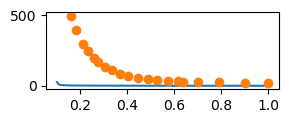

In [3]:
Pc_entry_bc = 0.9; m_bc = 2           ; Pc_bc = brooks_corey_pc(Sw,Swr,Snwr,Pc_entry_bc,m_bc)  # ; plt.figure(figsize=(3, 1), dpi=100) ; plt.plot(Sw, Pc_bc) 
pc_data = np.loadtxt(data_file_with_path, delimiter='\t')  ;Sw_micp=pc_data[:,0]  ;Pc_micp=pc_data[:,1] ;#plt.figure(figsize=(3,1)) ;plt.plot(Sw_micp,Pc_micp,'o')

plt.figure(figsize=(3, 1), dpi=100)      ; C1 = plt.plot(Sw, Pc_bc)   ; C2 = plt.plot(Sw_micp, Pc_micp, 'o') 

In [4]:
Snwr = 0                             # Sw = 1 ... at some point we know that the residual nonwetting saturation = 0
Pc_entry = np.min(Pc_micp)           # PSI    # capillary entry pressure .... at ... the mimimum capillary pressure measurement
print('approximation of capillary entry pressure = ' + str(Pc_entry) + ' PSI')

approximation of capillary entry pressure = 21.46641731 PSI


The best fit Swr is equal to 0.0693347237894737
The best fit m is equal to 0.7333333333333333


C:\Users\gross.DESKTOP-AIRQM2M\AppData\Local\Temp\ipykernel_15132\3838326477.py:3: RuntimeWarning: invalid value encountered in power
  Pc = Pc_entry*(Se**(-1/m))


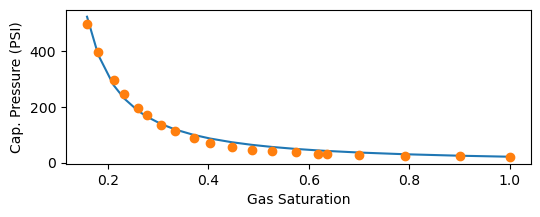

In [5]:
M = np.linspace(0.1, 2, num=100)   ; SWR = np.min(Sw_micp) + np.linspace(-0.1, 0.1, num=20)     ; least_square_min = 10000
for m in M:
    for Swr in SWR:
        Pc_bc = brooks_corey_pc(Sw_micp, Swr, Snwr, Pc_entry, m)
        least_square_m = np.sum((Pc_bc- Pc_micp)**2)
        if least_square_m < least_square_min:
            least_square_min = least_square_m
            min_m = m
            min_Swr = Swr
            
Pc_fit = brooks_corey_pc (Sw_micp, min_Swr, Snwr, Pc_entry,   min_m)
plt.figure(figsize=(6, 2), dpi=100)                    ; plt.plot   ( Sw_micp, Pc_fit )                       ; plt.plot(Sw_micp, Pc_micp, 'o')
plt.xlabel('Gas Saturation', fontsize=10)              ; plt.ylabel ('Cap. Pressure (PSI)', fontsize=10)
print('The best fit Swr is equal to ' + str(min_Swr))  ; print('The best fit m is equal to ' + str(min_m))